In [1]:
import seaborn as sns
from astropy.io import fits
from multiprocessing import Pool
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from astropy.table import Table
from glob import glob
plt.rcParams['axes.linewidth']= 3.
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['axes.linewidth']=5
plt.rcParams['xtick.major.size'] =15
plt.rcParams['ytick.major.size'] =15
plt.rcParams['xtick.minor.size'] =10
plt.rcParams['ytick.minor.size'] =10
plt.rcParams['xtick.major.width'] =5
plt.rcParams['ytick.major.width'] =5
plt.rcParams['xtick.minor.width'] =5
plt.rcParams['ytick.minor.width'] =5
plt.rcParams['figure.figsize'] = (16,16)

In [2]:
inList = glob('/scratch/mhuertas/TNG50_SDSS/Inputs/*')
inList2 = glob('/scratch/mhuertas/TNG50_SDSS/Outputs_orig/*')

OutList = glob('/scratch/mhuertas/TNG50_SDSS/Outputs/*')

In [3]:
inList[0],OutList[0],inList2[0]

('/scratch/mhuertas/TNG50_SDSS/Inputs/broadband_634652.fits_r_band.fits',
 '/scratch/mhuertas/TNG50_SDSS/Outputs/broadband_660683_FullReal.fits_r_band_FullReal.fits',
 '/scratch/mhuertas/TNG50_SDSS/Outputs_orig/broadband_660683_FullReal.fits_r_band_FullReal.fits')

In [4]:
def get_ids_in(x):
    return x.split('/')[-1].split('_')[1].split('.')[0]
def get_ids_out(x):
    return x.split('/')[-1].split('_')[1].split('.')[0]
In = sorted(list(map(get_ids_in, inList)))
In2 = sorted(list(map(get_ids_in, inList2)))
Out = sorted(list(map(get_ids_out, OutList)))

In [5]:
pars = [(x,y) for x,y in zip(In,Out)]
pars2 = [(x,y) for x,y in zip(In2,Out)]

In [6]:
def get_mag(x,y):
    x = '/scratch/mhuertas/TNG50_SDSS/Inputs/broadband_{}.fits_r_band.fits'.format(x)
    y = '/scratch/mhuertas/TNG50_SDSS/Outputs/broadband_{}_FullReal.fits_r_band_FullReal.fits'.format(y)
    indata = fits.getdata(x)
#inmag[i] = -2.5*np.log10(np.sum(10**(-0.4*(indata-22.5))*0.396**2))
    h = fits.getheader(y)
    aa =h['ZERO']
    kk = h['EXTC']
    airmass=h['AIRM']
    cpn = 53.907*10**(-0.4*(22.5+aa+kk*airmass)) # counts/nmaggie
    gain = h['GAIN']
    inmag=22.5-2.5*np.log10(np.sum(indata*53.9*6.0/(gain*cpn)))
    return inmag

def get_mag2(x,y):
    x = '/scratch/mhuertas/TNG50_SDSS/Outputs_orig/broadband_{}_FullReal.fits_r_band_FullReal.fits'.format(x)
    y = '/scratch/mhuertas/TNG50_SDSS/Outputs/broadband_{}_FullReal.fits_r_band_FullReal.fits'.format(y)
    indata = fits.getdata(x)
#inmag[i] = -2.5*np.log10(np.sum(10**(-0.4*(indata-22.5))*0.396**2))
    h = fits.getheader(y)
    aa =h['ZERO']
    kk = h['EXTC']
    airmass=h['AIRM']
    cpn = 53.907*10**(-0.4*(22.5+aa+kk*airmass)) # counts/nmaggie
    gain = h['GAIN']
    inmag=22.5-2.5*np.log10(np.sum(indata*53.9*6.0/(gain*cpn)))
    return inmag

In [7]:
from multiprocessing import Pool

with Pool() as p:
    mag = p.starmap(get_mag,pars)
with Pool() as p:
    mag2 = p.starmap(get_mag2,pars)

In [38]:
np.savetxt('../TNG50_cutouts/mag_match.txt', mag)

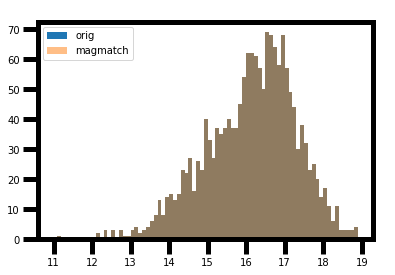

In [8]:
bins=np.arange(11,19,0.1)
plt.hist(mag, label='orig', bins=bins)
plt.hist(mag, label='magmatch', bins=bins, alpha=0.5)
plt.legend()